# BISM Lecture 4
**Script for reploting lecture 4**

In [1]:
#load libraries
library(ggplot2)
library(dplyr)
library(grid)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Section 1: Bar charts 

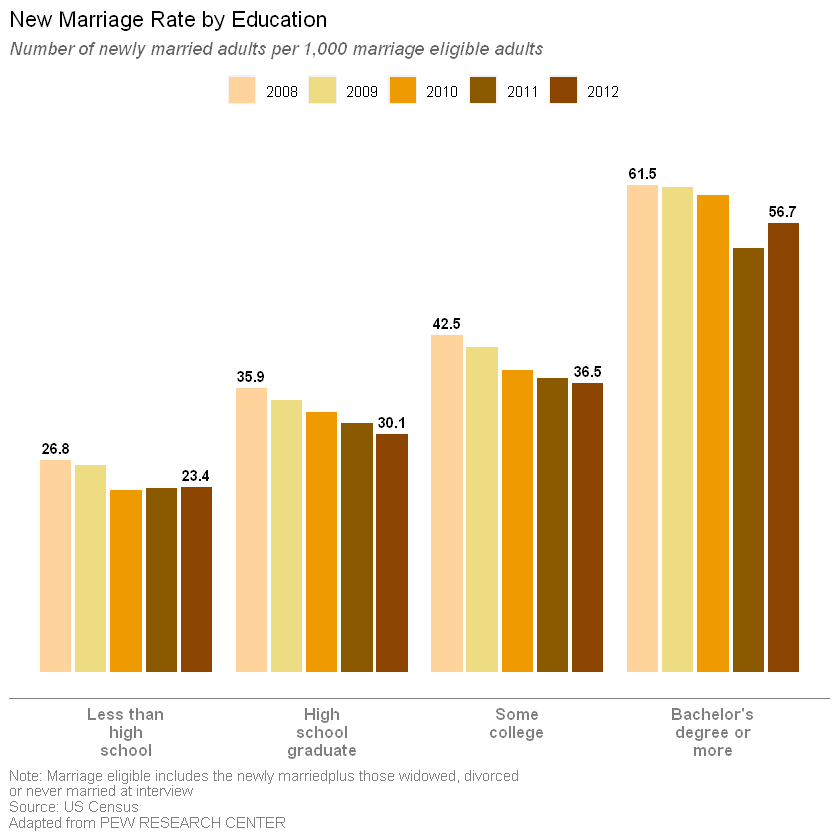

In [2]:
#create the dataset
df_marriage=data.frame(education=c(rep(c("Less than\nhigh\nschool","High\nschool\ngraduate","Some\ncollege","Bachelor's\ndegree or\nmore"),5)),
                       year=factor(c(rep(2008,4),rep(2009,4),rep(2010,4),rep(2011,4),rep(2012,4))), #use factor in year 
                       values=c(26.8,35.9,42.5,61.5,  26.1,34.4,41.1,61.2,  
                                23.0,32.9,38.2,60.3,  23.2,31.4,37.1,53.5,  
                                23.4,30.1,36.5,56.7))

#reorder the education column
df_marriage=df_marriage %>%
  mutate(education=factor(education,levels=c("Less than\nhigh\nschool","High\nschool\ngraduate","Some\ncollege","Bachelor's\ndegree or\nmore")))

#plot bar charts
ggplot(df_marriage,aes(x=education,y=values,fill=year))+
  geom_col(position = position_dodge(0.90),width =0.80)+ #modify bar size
  geom_text(aes(label=values,fontface = "bold"),position = position_dodge(0.90),vjust=-0.6,
            colour=c(rep("black",4),rep("white",12),rep("black",4)),size=3.1)+
  scale_fill_manual(values = c("burlywood1","lightgoldenrod2","orange2","orange4","darkorange4"))+
  scale_y_continuous(breaks = NULL,limits=c(0,65))+
  labs(title="New Marriage Rate by Education",
       subtitle = "Number of newly married adults per 1,000 marriage eligible adults",
       caption ="Note: Marriage eligible includes the newly marriedplus those widowed, divorced
or never married at interview
Source: US Census
Adapted from PEW RESEARCH CENTER",
       fill="")+
  theme(panel.background = element_blank(),
      panel.grid=element_blank(),
      axis.text.y = element_text(colour="white"),
      axis.text.x = element_text(colour="grey50",size=10,face="bold"),
      axis.ticks = element_blank(),
      axis.line.x = element_line(colour="grey50"),
      plot.subtitle = element_text(colour="grey40",hjust=0,face="italic"),
      plot.caption = element_text(colour="grey50",hjust=0),
      legend.position = "top",
      panel.border=element_blank())+
  xlab(NULL) + 
  ylab(NULL)

# Section 2: line charts

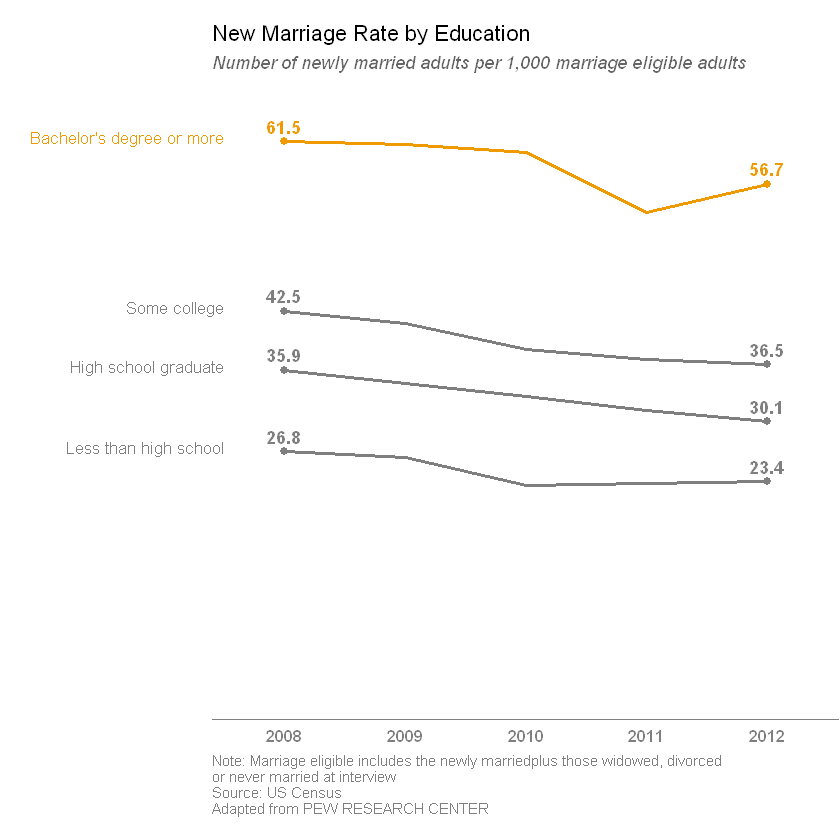

In [3]:
#modify the categories of the dataset in another variable
df_marriage2=data.frame(education=c(rep(c("Less than high school","High school graduate","Some college","Bachelor's degree or more"),5)),
                       year=factor(c(rep(2008,4),rep(2009,4),rep(2010,4),rep(2011,4),rep(2012,4))), #use factor in year 
                       values=c(26.8,35.9,42.5,61.5,  26.1,34.4,41.1,61.2,  
                                23.0,32.9,38.2,60.3,  23.2,31.4,37.1,53.5,  
                                23.4,30.1,36.5,56.7))

#reorder the education column
df_marriage2=df_marriage2 %>%
  mutate(education=factor(education,levels=c("Less than high school","High school graduate","Some college","Bachelor's degree or more")))

#create a dataset with only the data to be labelled
df_points1=df_marriage2 %>% filter (year %in% c(2008,2012))  

#plot the lines
ggplot(df_marriage2,aes(x=year,y=values,group=education,colour=education))+
  geom_line(size = 1)+
  scale_color_manual(values=c("grey50","grey50","grey50","orange2"),guide=FALSE)+
  geom_point(data=df_points1,aes(x=year,y=values),size=2)+
  geom_text(data=df_points1,aes(label=values,fontface = "bold"),vjust=-0.6)+
  scale_y_continuous(breaks = NULL,limits=c(0,65))+
  
  annotate("text",x=0.5,y=62,colour="orange2",label="Bachelor's degree or more",hjust=1,size=3.5)+
  annotate("text",x=0.5,y=43,colour="grey50",label="Some college",hjust=1,size=3.5)+
  annotate("text",x=0.5,y=36.4,colour="grey50",label="High school graduate",hjust=1,size=3.5)+
  annotate("text",x=0.5,y=27.3,colour="grey50",label="Less than high school",hjust=1,size=3.5)+
  
  coord_cartesian(clip = "off")+ 
  labs(title="New Marriage Rate by Education",
       subtitle = "Number of newly married adults per 1,000 marriage eligible adults",
       caption ="Note: Marriage eligible includes the newly marriedplus those widowed, divorced
or never married at interview
Source: US Census
Adapted from PEW RESEARCH CENTER",
       fill="")+
  theme(panel.background = element_blank(),
        panel.grid=element_blank(),
        axis.text.y = element_text(colour="white"),
        axis.text.x = element_text(colour="grey50",size=10,face="bold"),
        axis.ticks = element_blank(),
        axis.line.x = element_line(colour="grey50"),
        plot.subtitle = element_text(colour="grey40",hjust=0,face="italic"),
        plot.caption = element_text(colour="grey50",hjust=0),
        legend.position = "top",
        plot.margin = unit(c(0.5,0,0.5,4.5), "cm"),
        panel.border=element_blank())+
  xlab(NULL) + 
  ylab(NULL)

# Section 3: line chart with text

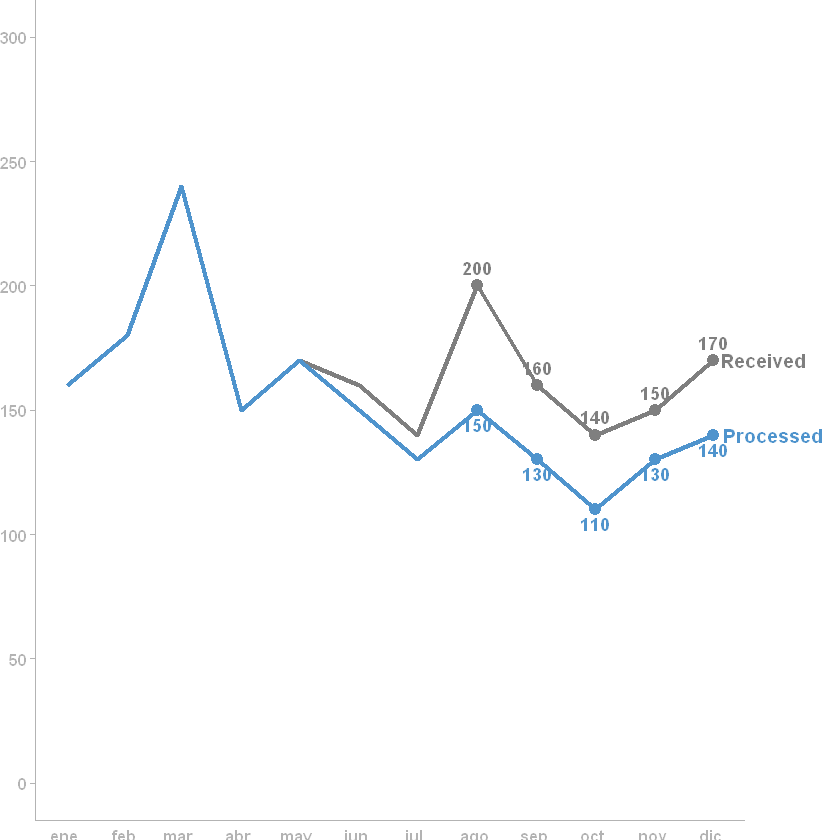

In [4]:
#create the dataset for the processing tickets
df_tickets1=data.frame(processed=c(160,180,240,150,170,150,130,150,130,110,130,140),
                       received=c(160,180,240,150,170,160,140,200,160,140,150,170),
                       date=seq.Date(as.Date("2019-01-01"), as.Date("2019-12-01"), by = "month"))
#filter the dataset from August
df_tickets2 = df_tickets1 %>%
  filter(date %in% seq.Date(as.Date("2019-08-01"), as.Date("2019-12-01"), by = "month"))


#plot the line chart
ggplot(df_tickets1,aes(x=date))+
  geom_line(aes(y=received),colour="grey50",size=1.3)+ #plot received data
  geom_line(aes(y=processed),colour="steelblue3",size=1.3)+ #plot processed data
  coord_cartesian(clip = "off")+ 
  scale_x_date(date_labels = "%h",date_breaks = "1 month")+ #adjust the x scale 
  scale_y_continuous(breaks = seq(0,300,50),limits=c(0,300))+ #adjust the y scale
  
  geom_point(data=df_tickets2,aes(x=date,y=processed),size=3,colour="steelblue3")+
  geom_text(data=df_tickets2,aes(label=processed,x=date,y=processed,fontface = "bold"),vjust=1.5,colour="steelblue3")+
  
  geom_point(data=df_tickets2,aes(x=date,y=received),size=3,colour="grey50")+
  geom_text(data=df_tickets2,aes(label=received,x=date,y=received,fontface = "bold"),vjust=-0.8,colour="grey50")+
  
  annotate("text",x=as.Date("2019-12-01"),y=170,colour="grey50",label="bold(Received)",hjust=-0.1,size=4,parse=TRUE)+
  annotate("text",x=as.Date("2019-12-01"),y=140,colour="steelblue3",label="bold(Processed)",hjust=-0.1,size=4,parse=TRUE)+
  

  theme(panel.background = element_blank(),
        panel.grid=element_blank(),
        axis.text = element_text(colour="grey70",size=10,face="bold"),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_line(colour="grey70"),
        axis.line = element_line(colour="grey70"),
        plot.margin = unit(c(0,2,0,0), "cm"),
        panel.border=element_blank())+
  xlab(NULL) + 
  ylab(NULL)

# Section 4: line charts with message

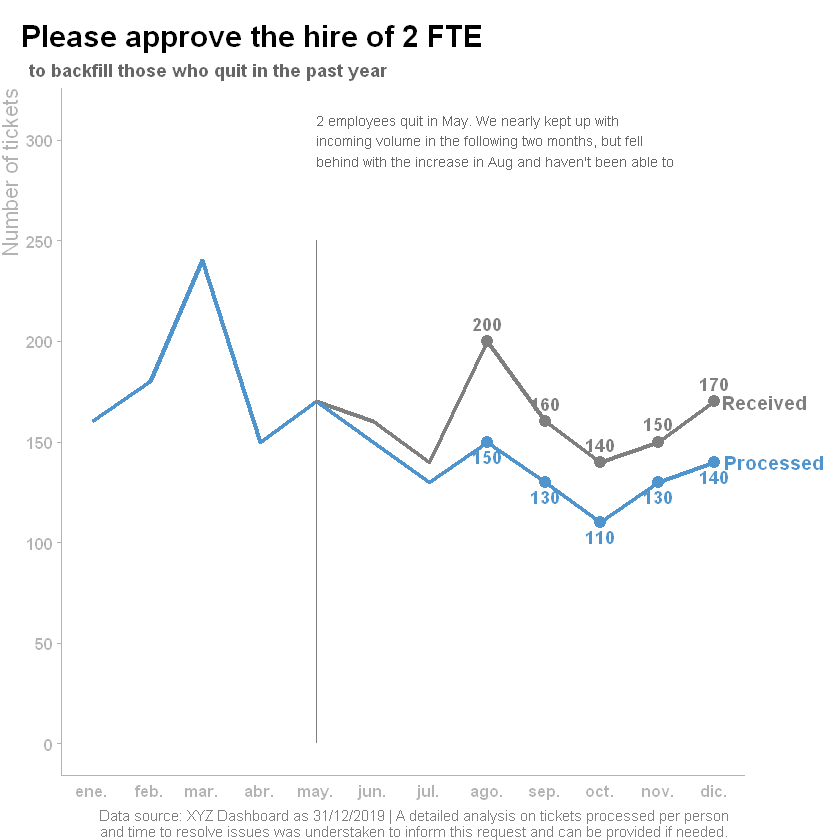

In [5]:
#2 employees quit in May. We nearly kept up with\nincoming volume in the following two months, but fell\nbehind with the increase in Aug and haven't been able to
txt_annotate1="2 employees quit in May. We nearly kept up with\nincoming volume in the following two months, but fell\nbehind with the increase in Aug and haven't been able to"

#plot the line chart with message
ggplot(df_tickets1,aes(x=date))+
  geom_line(aes(y=received),colour="grey50",size=1.3)+ #plot received data
  geom_line(aes(y=processed),colour="steelblue3",size=1.3)+ #plot processed data
  coord_cartesian(clip = "off")+ #allows to plot a label outside the x,y limits
  scale_x_date(date_labels = "%h",date_breaks = "1 month")+ #adjust the x scale 
  scale_y_continuous(breaks = seq(0,300,50),limits=c(0,310))+ #adjust the y scale
  
  geom_segment(aes(x = as.Date("2019-05-01"), y = 0, xend = as.Date("2019-05-01"), yend = 250),colour="grey50")+
  
  #plot processed points and labels
  geom_point(data=df_tickets2,aes(x=date,y=processed),size=3,colour="steelblue3")+
  geom_text(data=df_tickets2,aes(label=processed,x=date,y=processed,fontface = "bold"),vjust=+1.5,colour="steelblue3")+
  
  #plot received points and labels
  geom_point(data=df_tickets2,aes(x=date,y=received),size=3,colour="grey50")+
  geom_text(data=df_tickets2,aes(label=received,x=date,y=received,fontface = "bold"),vjust=-0.8,colour="grey50")+
  
  #plot the line labels
  annotate("text",x=as.Date("2019-12-01"),y=170,colour="grey50",label="bold(Received)",hjust=-0.1,size=4,parse=TRUE)+
  annotate("text",x=as.Date("2019-12-01"),y=140,colour="steelblue3",label="bold(Processed)",hjust=-0.1,size=4,parse=TRUE)+
  
  #modify title, subtitle and caption
  labs(title="Please approve the hire of 2 FTE",
       subtitle = "to backfill those who quit in the past year",
       caption = "Data source: XYZ Dashboard as 31/12/2019 | A detailed analysis on tickets processed per person
and time to resolve issues was understaken to inform this request and can be provided if needed."
       )+
  
  annotate("text",x=as.Date("2019-05-01"),y=300,label=txt_annotate1,hjust=0,size=3,colour="grey40")+
  
  
  #modify theme of the plot
  theme(panel.background = element_blank(),
        panel.grid=element_blank(),
        axis.text = element_text(colour="grey70",size=10,face="bold"),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_line(colour="grey70"),
        axis.line = element_line(colour="grey70"),
        plot.margin = unit(c(0.5,2,0,0), "cm"),
        plot.subtitle = element_text(colour="grey40",hjust=-0.1,face="bold"),
        plot.caption = element_text(colour="grey50",hjust=0.7),
        plot.title = element_text(size=18,face="bold",hjust=-0.18),
        axis.title = element_text(colour="grey70",hjust=1,size=13),
        panel.border=element_blank())+
  xlab(NULL) + 
  ylab("Number of tickets")

# Section 5: stacked bar - ugly

segm,cust,values,label_y
Segment 7,US Population,0.15,0.925
Segment 6,US Population,0.32,0.690
Segment 5,US Population,0.10,0.480
Segment 4,US Population,0.10,0.380
Segment 3,US Population,0.10,0.280
Segment 2,US Population,0.07,0.195
Segment 1,US Population,0.16,0.080


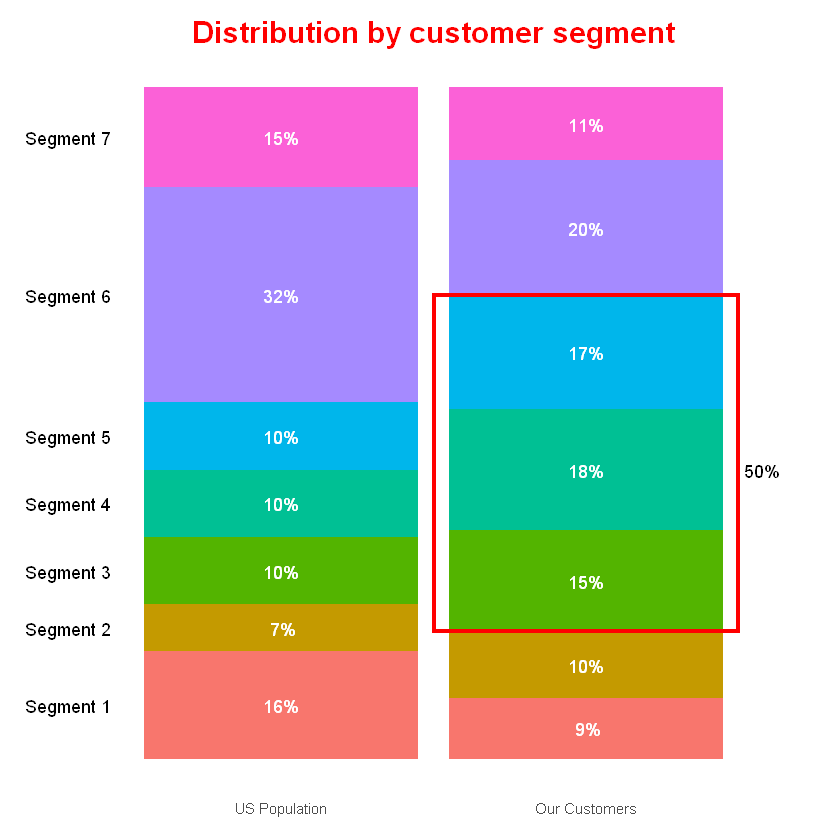

In [6]:
#create the dataset
df_stacked=data.frame(segm=rep(c("Segment 1","Segment 2","Segment 3","Segment 4",
                             "Segment 5","Segment 6","Segment 7"),2),
                      cust=c(rep("US Population",7),rep("Our Customers",7)),
                      values=c(0.16,0.07,0.10,0.10,0.10,0.32,0.15,0.09,0.10,0.15,0.18,0.17,0.20,0.11)
)
#define the order of the factors
df_stacked = df_stacked %>%
  mutate(segm = factor(segm,levels=c("Segment 1","Segment 2","Segment 3","Segment 4",
                                     "Segment 5","Segment 6","Segment 7")),
         cust=factor(cust,levels=c("US Population","Our Customers")))
#order the factors
df_stacked=df_stacked %>%
  arrange( rev(segm),rev(cust))

#group the factors and then add the y position of the text
df_stacked=df_stacked %>%
  group_by(cust) %>%
  mutate(label_y=1-cumsum(values)+values*0.5)

df_stacked_lab=df_stacked %>%
  filter(cust=="US Population")
df_stacked_lab

#plot the stacked bar chart
ggplot(df_stacked,aes(x=cust,y=values,fill=segm))+
  geom_col(position = position_stack(reverse = TRUE))+
  geom_text(aes(y=label_y,label=sprintf("%2.0f%%", values*100)),colour="white")+
  annotate("rect",xmin = 1.5,xmax = 2.5,ymin=0.19,ymax=.69,colour="red",alpha=0,size=1.4)+
  annotate("text",y=0.43,x=2.52,label="50%",hjust=0)+
  coord_cartesian(clip = "off")+ #allows to plot a label outside the x,y limits
  
  geom_text(data=df_stacked_lab,y=df_stacked_lab$label_y,x=rep(0.3,7),label=df_stacked_lab$segm)+
  labs(title="Distribution by customer segment")+
       
  #modify theme of the plot
  theme(panel.background = element_blank(),
        panel.grid=element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        plot.margin = unit(c(0.5,1.5,0.5,2), "cm"),
        plot.title = element_text(size=18,face="bold",hjust=0.5,colour="red"),
        legend.position="none",
        panel.border=element_blank())+
  xlab(NULL) + 
  ylab(NULL)

# Section 6: stacked bar - fashionable

Installing package into 'C:/Users/DELL/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggnewscale' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\DELL\AppData\Local\Temp\RtmpKkQTKp\downloaded_packages


Warning message:
"package 'ggnewscale' was built under R version 3.6.3"

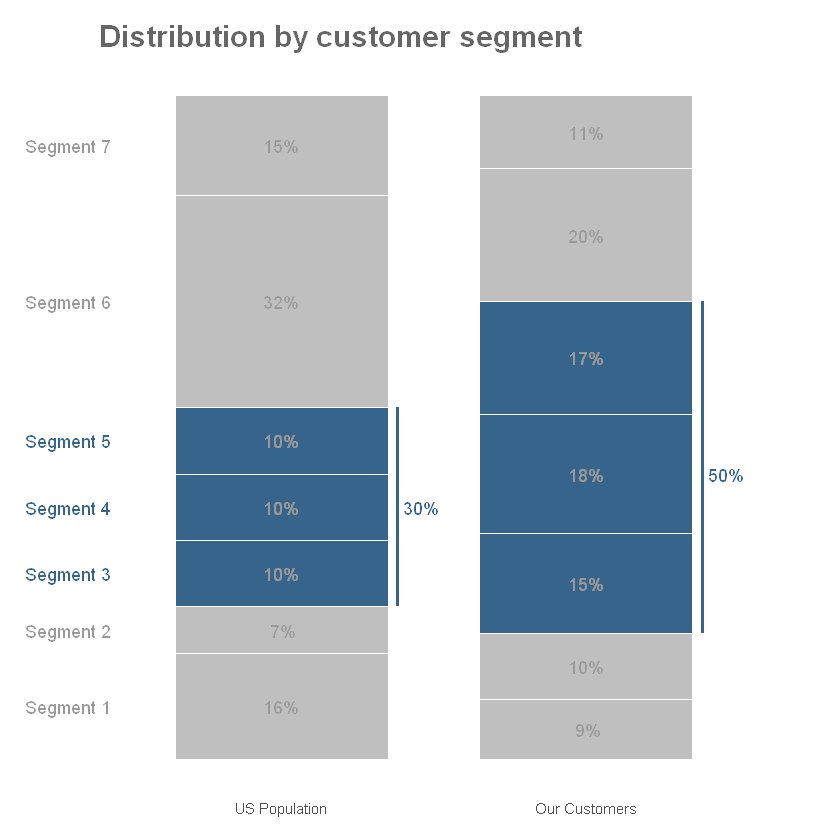

In [7]:
#install.packages("ggnewscale")
library(ggnewscale)


#plot stacked bar
ggplot(df_stacked,aes(x=cust,y=values,fill=segm,colour=segm))+
  geom_col(position = position_stack(reverse = TRUE),colour="White",width=0.7)+
  scale_fill_manual(values=c(rep("grey75",2),rep("steelblue4",3),rep("grey75",2)),guide=FALSE)+
  
  geom_text(aes(y=label_y,label=sprintf("%2.0f%%", values*100)),colour="grey60")+
  scale_colour_manual(values=c(rep("grey60",2),rep("steelblue4",3),rep("grey60",2)),guide=FALSE)+
  
  annotate("segment",x = 1.38, xend = 1.38, y = 0.23, yend = 0.53,colour="steelblue4",size=1)+
  annotate("segment",x = 2.38, xend = 2.38, y = 0.19, yend = 0.69,colour="steelblue4",size=1)+
  annotate("text",y=0.43,x=2.4,label="50%",hjust=0,colour="steelblue4")+
  annotate("text",y=0.38,x=1.4,label="30%",hjust=0,colour="steelblue4")+
  coord_cartesian(clip = "off")+ #allows to plot a label outside the x,y limits
  
  geom_text(data=df_stacked_lab,y=df_stacked_lab$label_y,x=rep(0.3,7),label=df_stacked_lab$segm)+
  labs(title="Distribution by customer segment")+
  
  #modify theme of the plot
  theme(panel.background = element_blank(),
        panel.grid=element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        plot.margin = unit(c(0.5,1.5,0.5,2), "cm"),
        plot.title = element_text(size=18,face="bold",hjust=0,colour="grey40"),
        legend.position="none",
        panel.border=element_blank())+
  xlab(NULL) + 
  ylab(NULL)
